# Analysis of NFL Team Performance on Injury

In [1]:
# Import all necessary modules

import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from datetime import datetime

In [2]:
# Initialize DB connection

mydb = mysql.connector.connect(host="imc.kean.edu", user="fisheral", password="1117936")
cursor = mydb.cursor(dictionary = True, buffered = True)

query = "use 2023S_patpanka;"
cursor.execute(query)

In [3]:
# Get all playkeys for plays where injuries occurred

injury_plays = []
query = "SELECT PlayKey from InjuryRecord where PlayKey order by rand()"
cursor.execute(query)
row = cursor.fetchone()
while row is not None:
    injury_plays.append(row['PlayKey'])
    row = cursor.fetchone()

print(injury_plays)

['47334-8-1', '44542-13-20', '44434-10-31', '31070-3-7', '35611-7-42', '43540-3-14', '43826-7-12', '44489-11-32', '38876-29-14', '47235-7-55', '43532-5-69', '46394-18-3', '43672-8-9', '39656-2-38', '38364-5-23', '47813-8-19', '38192-8-8', '45950-8-18', '46014-10-22', '44511-5-41', '44482-20-21', '36557-1-70', '42418-19-15', '44860-5-52', '42637-3-6', '41145-2-60', '40474-1-8', '33337-8-15', '44421-12-41', '47287-4-16', '41209-9-9', '36621-13-58', '44900-7-10', '39850-9-2', '42398-15-33', '45983-18-21', '36607-16-19', '47382-3-34', '42600-3-1', '42348-23-53', '46098-17-27', '45962-8-40', '43518-6-25', '42406-6-13', '43540-7-2', '44440-6-18', '33474-19-7', '39678-2-1', '43505-2-49', '44806-7-61', '39956-2-14', '47307-10-18', '45966-4-27', '34347-5-9', '47220-4-16', '46119-3-16', '38228-1-4', '46316-5-4', '35570-15-35', '46646-3-30', '47307-10-18', '44492-3-23', '46430-8-6', '46331-4-44', '46074-7-26', '36559-12-65', '46587-2-13', '41094-1-55', '45187-9-4', '44449-6-13', '42456-20-76', '4

In [4]:
# Get as many playkeys for sample plays where injuries did not occur as there are samples for injury plays

non_injury_plays = []
query = "SELECT PlayKey from Non_Injured_Samples2"
cursor.execute(query)
row = cursor.fetchone()
while row is not None:
    non_injury_plays.append(row['PlayKey'])
    row = cursor.fetchone()

print(non_injury_plays)

['45987-15-6', '36572-10-28', '43656-9-52', '39794-23-62', '43540-9-19', '44067-18-35', '42472-11-12', '44433-4-13', '44614-12-34', '42470-3-45', '39748-22-23', '46394-7-10', '40335-23-24', '33337-1-15', '41113-17-28', '38252-18-66', '30953-4-44', '42413-19-1', '44629-21-27', '41113-5-59', '39680-21-68', '36803-13-64', '41209-10-65', '45927-8-24', '44434-13-51', '26624-29-25', '44799-11-17', '44485-14-38', '36656-14-31', '39664-20-13', '44548-20-35', '44569-26-14', '44463-18-22', '38281-15-7', '36803-11-51', '39794-27-63', '41113-13-88', '47376-2-11', '44037-20-49', '44203-7-22', '46119-12-12', '36630-3-53', '36877-28-26', '39794-22-49', '44418-15-48', '41152-20-21', '44542-9-5', '38252-1-42', '41113-11-46', '44647-9-1', '38274-14-36', '34230-5-26', '42780-20-17', '45950-7-62', '43490-29-33', '41664-21-6', '39771-29-12', '47195-16-32', '43656-11-7', '44517-2-39', '44806-16-16', '43540-5-4', '44451-25-31', '42472-8-17', '45974-23-29', '30068-10-12', '41084-3-22', '42456-7-8', '45077-22-

## Max Speed
##### Null hypothesis: There is no correlation between max speed of player and injury occurrence
##### Alternative hypothesis: There is a positive correlation between having a higher max speed and the probability of injury occurrence

In [5]:
# Get max_speed of plays where injury occurred

injury_max_speeds = []
for play in injury_plays:
    query = "SELECT injury_play_max_speed as max_speed from InjuredPlayerData2 where PlayKey = '" + play + "'"
    cursor.execute(query)
    injury_max_speeds.append(cursor.fetchone()['max_speed'])
    
print(injury_max_speeds)
print("Length:", len(injury_max_speeds))

[10.11, 7.37, 5.62, 7.26, 3.21, 2.73, 3.73, 6.96, 7.85, 8.17, 4.73, 9.56, 2.38, 6.38, 7.75, 9.12, 7.28, 5.03, 9.97, 6.39, 2.96, 5.75, 4.72, 2.9, 8.4, 2.13, 9.05, 6.35, 7.57, 5.45, 5.15, 3.15, 8.68, 8.27, 10.43, 4.25, 6.38, 3.17, 9.55, 5.99, 7.59, 4.99, 5.31, 2.38, 4.25, 6.59, 7.46, 1.17, 3.12, 2.39, 6.7, 8.33, 6.82, 9.48, 6.93, 9.35, 9.2, 2.33, 3.38, 7.23, 8.33, 4.34, 7.26, 5.84, 7.26, 5.81, 9.42, 6.25, 5.81, 5.83, 3.22, 6.95, 3.74, 8.04, 7.34, 2.38, 8.98]
Length: 77


In [6]:
# Get max_speed of plays where injury did not occur

non_injury_max_speeds = []
for play in non_injury_plays[:len(injury_plays)]:
    query = "SELECT max(s) as max_speed from Non_Injured_Player_Track_Data2 where PlayKey = '" + play + "'"
    cursor.execute(query)
    non_injury_max_speeds.append(cursor.fetchone()['max_speed'])
    

print(non_injury_max_speeds)
print("Length:", len(non_injury_max_speeds))

[6.82, 6.48, 6.91, 3.86, 5.3, 4.33, 5.11, 2.47, 9.55, 4.57, 7.57, 5.5, 8.27, 5.96, 4.38, 7.89, 4.74, 7.23, 4.48, 5.41, 4.57, 5.05, 5.93, 3.85, 1.96, 1.57, 4.93, 6.45, 8.19, 3.17, 6.37, 8.25, 4.1, 5.77, 7.68, 3.94, 2.93, 7.72, 4.76, 9.1, 5.44, 8.24, 2.43, 2.67, 3.1, 4.67, 6.29, 6.53, 1.94, 7.33, 4.15, 3.73, 2.14, 2.24, 2.19, 1.56, 3.78, 3.57, 5.35, 4.8, 2.75, 7.03, 4.82, 3.41, 5.18, 3.81, 6.53, 4.04, 6.23, 4.1, 1.41, 6.59, 5.42, 5.3, 3.88, 3.03, 1.94]
Length: 77


In [7]:
injury_max_speeds = np.array(injury_max_speeds)
non_injury_max_speeds = np.array(non_injury_max_speeds)

mean_injury_max_speed = np.mean(injury_max_speeds)
mean_non_injury_max_speed = np.mean(non_injury_max_speeds)

print("Mean max_speed of plays with injuries:", mean_injury_max_speed)
print("Mean max_speed of plays without injuries:", mean_non_injury_max_speed)

Mean max_speed of plays with injuries: 6.151948051948052
Mean max_speed of plays without injuries: 4.944675324675324


In [8]:
# Calculate variance function
def variance(data):
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(data) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in data]
    # Variance
    variance = sum(deviations) / n
    return variance


In [9]:
# Calculate variance of both datasets

print("Injury Max Speeds Variance:", variance(injury_max_speeds))
print("Non-Injury Max Speeds Variance:", variance(non_injury_max_speeds))

Injury Max Speeds Variance: 5.49952477652218
Non-Injury Max Speeds Variance: 3.8468924270534655


In [10]:
import scipy.stats as stats

# Create a binary variable indicating if the play caused an injury or not
injury = [1] * len(injury_max_speeds) + [0] * len(non_injury_max_speeds)

# Perform the Pearson correlation test
correlation, p_value = stats.pearsonr(injury, np.concatenate((injury_max_speeds, non_injury_max_speeds)))

print("Correlation coefficient:", correlation)
print("p-value:", p_value)


Correlation coefficient: 0.2689454372691529
p-value: 0.0007443655068907504


### Conclusion:
#### Because the p-value is below the significance value of 0.05, we can accept the alternative hypothesis that there is a correlation between a player's max speed during a play and the probability of an injury occuring.

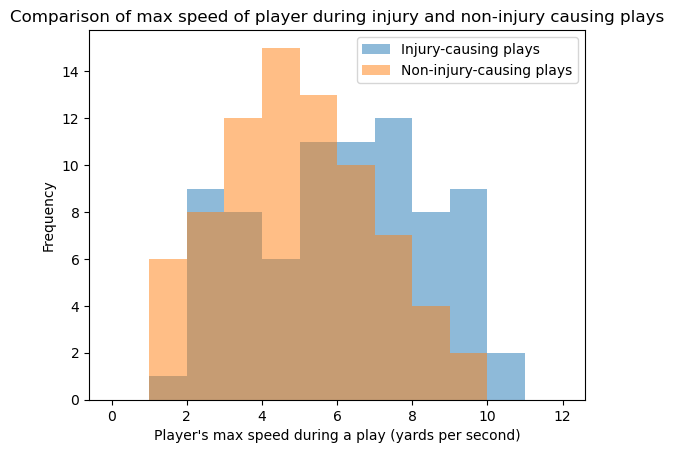

In [11]:
# Plot max speed comparison

x = injury_max_speeds
y = non_injury_max_speeds

plt.hist(x, alpha=0.5, bins=range(0, 13), label='Injury-causing plays')
plt.hist(y, alpha=0.5, bins=range(0, 13), label='Non-injury-causing plays')
plt.legend(loc='upper right')
plt.xlabel("Player's max speed during a play (yards per second)")
plt.ylabel("Frequency")
plt.title("Comparison of max speed of player during injury and non-injury causing plays")
plt.show()

## Field types
##### Null hypothesis: There is no correlation between field type and the probability of an injury occuring.
##### Alternative hypothesis: There is a correlation between field type and the probability of an injury occuring.

In [12]:
# Data gathering


injury_field_types = []
query = "select Surface from InjuryRecord"
cursor.execute(query)
row = cursor.fetchone()
while row is not None:
    field_type = row['Surface']
    injury_field_types.append(field_type)
    row = cursor.fetchone()

print(injury_field_types)

population_field_types = []
query = "select FieldType from PlayList order by rand() limit 5000"
cursor.execute(query)
row = cursor.fetchone()
while row is not None:
    field_type = row['FieldType']
    population_field_types.append(field_type)
    row = cursor.fetchone()

print(population_field_types[:500])

['Synthetic', 'Natural', 'Synthetic', 'Natural', 'Synthetic', 'Natural', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Synthetic', 'Natural', 'Natural', 'Natural', 'Natural', 'Synthetic', 'Synthetic', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Synthetic', 'Synthetic', 'Natural', 'Natural', 'Synthetic', 'Natural', 'Natural', 'Synthetic', 'Natural', 'Natural', 'Natural', 'Synthetic', 'Natural', 'Synthetic', 'Natural', 'Natural', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Synthetic', 'Synthetic', 'Synthetic', 'Synthetic', 'Synthetic', 'Natural', 'Natural', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Natural', 'Synthetic', 'Synthetic', 'Synthetic', 'Synthetic', 'Natural', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Synthetic', 'Synthetic', 'Natural', 'Natural'

In [25]:
observed = injury_table

# get population ratios
population_ratios = population_table/len(population_table) 
print("Population ratios")
print(population_ratios)

expected = population_ratios * len(injury_table)
print("\nExpected:")
print(expected)

chi_squared_stat = (((observed-expected)**2)/expected).sum()
print(chi_squared_stat)

Population ratios
col_0       count
0                
Natural    1469.0
Synthetic  1031.0

Expected:
col_0       count
0                
Natural    2938.0
Synthetic  2062.0
col_0
count    4792.359862
dtype: float64


In [52]:
# Print ratios for population and injury sample

population_field_types = pd.DataFrame(population_field_types)
injury_field_types = pd.DataFrame(injury_field_types)

population_table = pd.crosstab(index=population_field_types[0], columns="count")
injury_table = pd.crosstab(index=injury_field_types[0], columns="count")

population_field_types_ratio = population_table / len(population_field_types)

print("Population table")
print(population_field_types_ratio)


observed = injury_table
expected = population_field_types_ratio * len(injury_field_types)


chi_squared_stat = (((observed-expected)**2)/expected).sum()
print("\n", chi_squared_stat)

Population table
col_0       count
0                
Natural    0.5876
Synthetic  0.4124
col_0       count
0                
Natural    61.698
Synthetic  43.302
col_0      count
0               
Natural       48
Synthetic     57

 col_0
count    7.374364
dtype: float64


In [44]:
crit = stats.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence
                     df = 1) # DF = number of variable categories - 1

print("Critical value")
print(crit)

p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = 1)

print("P value")
print(p_value)

Critical value
3.841458820694124
P value
[0.00661602]


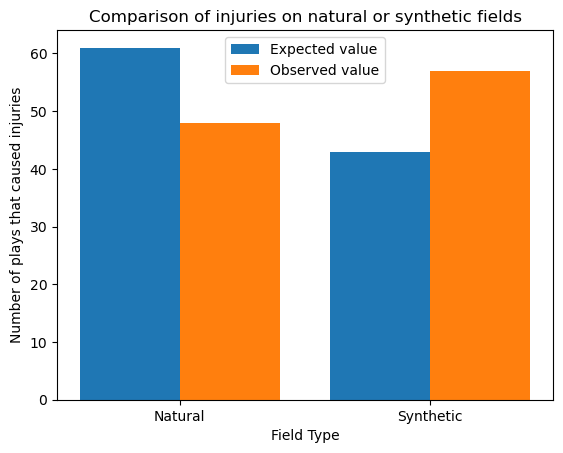

In [77]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Natural', 'Synthetic']
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, expected.values.ravel().astype(int), 0.4, label = 'Expected value')
plt.bar(X_axis + 0.2, observed.values.ravel().astype(int), 0.4, label = 'Observed value')
  
plt.xticks(X_axis, X)
plt.xlabel("Field Type")
plt.ylabel("Number of plays that caused injuries")
plt.title("Comparison of injuries on natural or synthetic fields")
plt.legend()
plt.show()

In [72]:
print(expected.values[:].ravel())

[61.698 43.302]


In [15]:
time = datetime.now().strftime("%H:%M:%S")
print(time)

09:04:04


In [42]:
# Create a binary variable indicating if the play caused an injury or not
injury = [1] * len(injury_field_types) + [0] * len(non_injury_field_types)

# Perform the Pearson correlation test
correlation, p_value = stats.pearsonr(injury, np.concatenate((injury_field_types, non_injury_field_types)))

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

NameError: name 'non_injury_field_types' is not defined

### Conclusion:
#### Because the p-value is above the significance value of 0.05, we cannot reject the null hypothesis that there is no correlation between the football field being natural or synthetic and the probability of injury occurrence.

## Temperature
##### Null hypothesis: There is no correlation between temperature and the probability of an injury occuring.
##### Alternative hypothesis: There is a correlation between temperature and the probability of an injury occuring.

In [ ]:
# Get temperature of plays where injury did occur

injury_temps = []
for play in injury_plays:
    query = "SELECT Temp from PlayList where PlayKey = '" + play + "' and Temp != -999"
    cursor.execute(query)
    row = cursor.fetchone()
    if row is not None:
        injury_temps.append(row['Temp'])
    
    
print(injury_temps)

# Get temperature of plays where injury did not occur

non_injury_temps = []
for play in non_injury_plays[:len(injury_plays)]:
    query = "SELECT Temp from PlayList where PlayKey = '" + play + "' and Temp != -999"
    cursor.execute(query)
    row = cursor.fetchone()
    if row is not None:
        non_injury_temps.append(row['Temp'])
    
    
print(non_injury_temps)

In [ ]:
# Create a binary variable indicating if the play caused an injury or not
injury = [1] * len(injury_temps) + [0] * len(non_injury_temps)

# Perform the Pearson correlation test
correlation, p_value = stats.pearsonr(injury, np.concatenate((injury_temps, non_injury_temps)))

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

### Conclusion:
#### Because the p-value is above the significance level of 0.05, we cannot reject the null hypothesis that there is no correlation between temperature and injury occurrence.